In [132]:
import json
from pit.store import load_json
import os
import nltk
from nltk import word_tokenize

In [133]:
DIR = [
    "../corpus/eurogamer",
    "../corpus/ign",
    "../corpus/kotaku",
    "../corpus/gamasutra"
]


# combine all text
text = ""
file_count = 0
for directory in DIR:
    for filename in os.listdir(directory):
        file_count += 1
        store = load_json("{}/{}".format(directory, filename))
        data = store.data()
        text += " "+data["text"]
    

In [134]:
words = text.split(" ")

In [135]:
len(words)

468088

In [136]:
print(words[:100])

['', "\nThere's", 'a', 'reason', 'why', 'Team', "Ico's", 'Shadow', 'of', 'the', 'Colossus', 'commands', 'so', 'much', 'love', 'and', 'respect', 'from', 'the', 'PlayStation', 'audience.', 'From', 'a', 'technical', 'perspective,', 'it', 'pushed', 'the', 'PlayStation', '2', 'hardware', 'further', 'than', 'it', 'had', 'gone', 'before,', 'but', 'it', 'also', 'delivered', 'a', 'special', 'style', 'and', 'atmosphere', 'that', 'set', 'it', 'apart', 'from', 'anything', 'else', 'that', 'had', 'gone', 'before.', 'In', 'essence,', 'it', 'was', 'the', 'type', 'of', 'game', 'that', 'only', 'comes', 'along', 'very', 'rarely', '-', 'an', 'experience', 'that', 'actually', 'strengthens', "one's", 'love', 'for', 'the', 'gaming', 'medium.\nTo', 'revive', 'such', 'a', 'classic', 'in', 'the', 'modern', 'age', 'for', "today's", 'console', 'hardware', 'is', 'a', 'potentially', 'hazardous', 'exercise,']


In [137]:
file_count

535

In [18]:
tokens = word_tokenize(text)
len(tokens)
print(tokens[:100])

['There', "'s", 'a', 'reason', 'why', 'Team', 'Ico', "'s", 'Shadow', 'of', 'the', 'Colossus', 'commands', 'so', 'much', 'love', 'and', 'respect', 'from', 'the', 'PlayStation', 'audience', '.', 'From', 'a', 'technical', 'perspective', ',', 'it', 'pushed', 'the', 'PlayStation', '2', 'hardware', 'further', 'than', 'it', 'had', 'gone', 'before', ',', 'but', 'it', 'also', 'delivered', 'a', 'special', 'style', 'and', 'atmosphere', 'that', 'set', 'it', 'apart', 'from', 'anything', 'else', 'that', 'had', 'gone', 'before', '.', 'In', 'essence', ',', 'it', 'was', 'the', 'type', 'of', 'game', 'that', 'only', 'comes', 'along', 'very', 'rarely', '-', 'an', 'experience', 'that', 'actually', 'strengthens', 'one', "'s", 'love', 'for', 'the', 'gaming', 'medium', '.', 'To', 'revive', 'such', 'a', 'classic', 'in', 'the', 'modern', 'age']


In [23]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

lem_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
print(lem_tokens[:100])

['There', "'s", 'a', 'reason', 'why', 'Team', 'Ico', "'s", 'Shadow', 'of', 'the', 'Colossus', 'command', 'so', 'much', 'love', 'and', 'respect', 'from', 'the', 'PlayStation', 'audience', '.', 'From', 'a', 'technical', 'perspective', ',', 'it', 'pushed', 'the', 'PlayStation', '2', 'hardware', 'further', 'than', 'it', 'had', 'gone', 'before', ',', 'but', 'it', 'also', 'delivered', 'a', 'special', 'style', 'and', 'atmosphere', 'that', 'set', 'it', 'apart', 'from', 'anything', 'else', 'that', 'had', 'gone', 'before', '.', 'In', 'essence', ',', 'it', 'wa', 'the', 'type', 'of', 'game', 'that', 'only', 'come', 'along', 'very', 'rarely', '-', 'an', 'experience', 'that', 'actually', 'strengthens', 'one', "'s", 'love', 'for', 'the', 'gaming', 'medium', '.', 'To', 'revive', 'such', 'a', 'classic', 'in', 'the', 'modern', 'age']


In [24]:
alice = nltk.corpus.gutenberg.words("carroll-alice.txt")

In [29]:
from nltk import FreqDist
import pygal 

freq_dist_alice = FreqDist(alice)
top_25 = freq_dist_alice.most_common(25)

In [32]:
line_chart = pygal.Bar()
for token, count in top_25:
    line_chart.add(token, count)

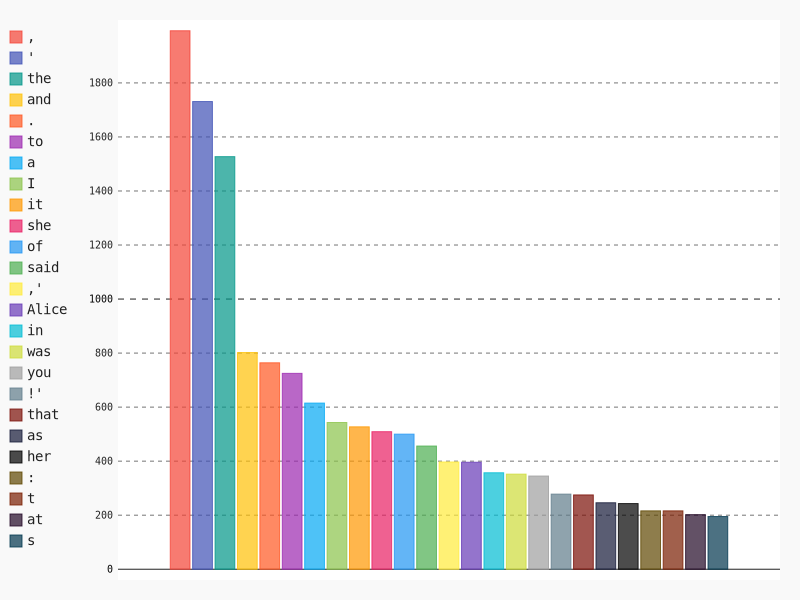

In [33]:
line_chart

In [37]:
new_chart = pygal.Bar()
for w in set(alice):
    if len(w) > 6 and freq_dist_alice[w] > 7:
        new_chart.add(w, freq_dist_alice[w])

In [41]:
alice_pos = nltk.pos_tag(alice)
alice_pos[:10]

[('[', 'JJ'),
 ('Alice', 'NNP'),
 ("'", 'POS'),
 ('s', 'NN'),
 ('Adventures', 'NNS'),
 ('in', 'IN'),
 ('Wonderland', 'NNP'),
 ('by', 'IN'),
 ('Lewis', 'NNP'),
 ('Carroll', 'NNP')]

In [43]:
fd = FreqDist(alice_pos)
fd_tagged = FreqDist(tag for (word, tag) in alice_pos)
fd_tagged.most_common(10)

[('NN', 3435),
 ('IN', 2994),
 ('DT', 2901),
 ('PRP', 2714),
 ('NNP', 2480),
 ('VBD', 2465),
 (',', 1993),
 ('RB', 1916),
 ('JJ', 1693),
 ("''", 1294)]

In [44]:
[ w[0] for (w,_) in fd.most_common() if w[1] == "NNP" ][:10]

['Alice', ",'", "!'", ".'", "?'", 'Queen', 'King', 'Turtle', 'Mock', 'Gryphon']

In [7]:
import os
import codecs

In [8]:
dataset_path = "/home/pmuehleder/datasets"
review_file = os.path.join(dataset_path, "review.json")
business_file = os.path.join(dataset_path, "business.json")

In [25]:
restaurant_ids = set()

with codecs.open(business_file, encoding="utf_8") as f:
    
    for business_json in f:
        business = json.loads(business_json)

        if "Restaurants" not in business["categories"]:
            continue
        restaurant_ids.add(business["business_id"])


In [26]:
restoraunt_ids = frozenset(restaurant_ids)

In [27]:
print("{} restaurants in dataset".format(len(restaurant_ids)))

54618 restaurants in dataset


In [14]:
review_txt_file = os.path.join(dataset_path, "review_text_all.txt")

In [32]:
review_count = 0

failure = 0

with open(review_txt_file, "w") as review_text:
    with codecs.open(review_file, encoding="utf_8") as review_json_file:
        for review_json in review_json_file:
            try:
                review = json.loads(review_json)
            except:
                failure += 1
                continue
                
            if review["business_id"] not in restaurant_ids:
                continue
            review_text.write(review["text"].replace("\n", "\\n")+"\n")
            review_count += 1
            
print(failure)
print(review_count)

1
141672


In [5]:
import spacy
import pandas as pd
import itertools as it

In [6]:
nlp = spacy.load("en")

In [35]:
with open(review_txt_file) as f:
    lines = f.readlines()
    

In [46]:
sample_review = lines[93]
sample_review = sample_review.replace("\\n", "\n")

In [47]:
print(sample_review)

Our friends got the groupon for four people and took us along. I'm very pleased we went! Having never had Ethiopian food before, we were curious, but wary. The deal really helped us dive in. It included two appetizers, four main courses and two desserts. We started with two appetizers, one I wasn't a huge fan of (a "salad" with a strong vinegar taste and jalapenos, which I found too strong, although other people in my group really liked it). The other appetizer was similar to an Indian samosa (similar name too, but I can't remember exactly what it was called). They were stuff with lentils and had a flaky shell. They were DELICIOUS. BUT, their appetizers were only made for three people, so there were only three of them! Seems silly when you offer a four person deal. 
We each ordered a different main course and they brought them on one large platter, so we could all share. We ordered two vegetarian options, one of lentils and one of chickpeas and one of chicken and one of beef. Basically

In [38]:
len(lines)

141696

In [49]:
%%time
parsed_review = nlp(sample_review)

CPU times: user 310 ms, sys: 284 ms, total: 594 ms
Wall time: 190 ms


In [51]:
for num, sentence in enumerate(parsed_review.sents):
    print("sentence: {}:".format(num+1))
    print(sentence)
    print(" ")

sentence: 1:
Our friends got the groupon for four people and took us along.
 
sentence: 2:
I'm very pleased we went!
 
sentence: 3:
Having never had Ethiopian food before, we were curious, but wary.
 
sentence: 4:
The deal really helped us dive in.
 
sentence: 5:
It included two appetizers, four main courses and two desserts.
 
sentence: 6:
We started with two appetizers, one I wasn't a huge fan of (a "salad" with a strong vinegar taste and jalapenos, which I found too strong, although other people in my group really liked it).
 
sentence: 7:
The other appetizer was similar to an Indian samosa (similar name too, but I can't remember exactly what it was called).
 
sentence: 8:
They were stuff with lentils and had a flaky shell.
 
sentence: 9:
They were DELICIOUS.
 
sentence: 10:
BUT, their appetizers were only made for three people, so there were only three of them!
 
sentence: 11:
Seems silly when you offer a four person deal. 

 
sentence: 12:
We each ordered a different main course a

In [52]:
for num, entity in enumerate(parsed_review.ents):
    print("Entity {}:".format(num+1), entity, " - ", entity.label_)
    print(" ")

Entity 1: four  -  CARDINAL
 
Entity 2: Ethiopian  -  NORP
 
Entity 3: two  -  CARDINAL
 
Entity 4: four  -  CARDINAL
 
Entity 5: two  -  CARDINAL
 
Entity 6: two  -  CARDINAL
 
Entity 7: Indian  -  NORP
 
Entity 8: three  -  CARDINAL
 
Entity 9: only three  -  CARDINAL
 
Entity 10: four  -  CARDINAL
 
Entity 11: 
  -  GPE
 
Entity 12: one  -  CARDINAL
 
Entity 13: two  -  CARDINAL
 
Entity 14: one  -  CARDINAL
 
Entity 15: one  -  CARDINAL
 
Entity 16: one  -  CARDINAL
 
Entity 17: one  -  CARDINAL
 
Entity 18: Worked  -  PERSON
 
Entity 19: 
  -  GPE
 
Entity 20: two  -  QUANTITY
 
Entity 21: Ethiopian  -  NORP
 
Entity 22: 
  -  GPE
 
Entity 23: Ethiopian  -  NORP
 
Entity 24: 
  -  GPE
 
Entity 25: 
  -  GPE
 


In [53]:
token_text = [ token.orth_ for token in parsed_review ]
token_pos = [ token.pos_ for token in parsed_review ]

In [57]:
pd.DataFrame([ x for x in zip(token_text, token_pos)], columns=["token_text", "part_of_speach"])

,token_text,part_of_speach
0,Our,ADJ
1,friends,NOUN
2,got,VERB
3,the,DET
4,groupon,NOUN
5,for,ADP
6,four,NUM
7,people,NOUN
8,and,CCONJ
9,took,VERB


In [58]:
token_lemma = [ token.lemma_ for token in parsed_review ]
token_shape = [ token.shape_ for token in parsed_review ]

pd.DataFrame( [ x for x in zip(token_text, token_lemma, token_shape)], columns=["token_text", "token_lemma", "token_shape"] )

,token_text,token_lemma,token_shape
0,Our,-PRON-,Xxx
1,friends,friend,xxxx
2,got,get,xxx
3,the,the,xxx
4,groupon,groupon,xxxx
5,for,for,xxx
6,four,four,xxxx
7,people,people,xxxx
8,and,and,xxx
9,took,take,xxxx


In [59]:
token_entity_type = [ token.ent_type_ for token in parsed_review ]
token_entity_iob = [ token.ent_iob_ for token in parsed_review ]

pd.DataFrame( [ x for x in zip(token_text, token_entity_type, token_entity_iob)], columns=["token_text", "enitity_type", "inside_outside_begin"] )

,token_text,enitity_type,inside_outside_begin
0,Our,,O
1,friends,,O
2,got,,O
3,the,,O
4,groupon,,O
5,for,,O
6,four,CARDINAL,B
7,people,,O
8,and,,O
9,took,,O


In [69]:
token_att = [ (token.orth_, token.prob, token.is_stop, token.is_punct, token.is_space, token.like_num, token.is_oov) for token in parsed_review]

In [70]:
pd.DataFrame(token_att, columns=["text", "log", "stop", "punct", "whitespace", "num", "oov"])

,text,log,stop,punct,whitespace,num,oov
0,Our,-20.0,False,False,False,False,True
1,friends,-20.0,False,False,False,False,True
2,got,-20.0,False,False,False,False,True
3,the,-20.0,True,False,False,False,True
4,groupon,-20.0,False,False,False,False,True
5,for,-20.0,True,False,False,False,True
6,four,-20.0,True,False,False,True,True
7,people,-20.0,False,False,False,False,True
8,and,-20.0,True,False,False,False,True
9,took,-20.0,False,False,False,False,True


### phrase modelling

In [1]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

In [9]:
def punct_space(token):
    return token.is_punct or token.is_space

In [10]:
def line_review(filename):
    with open(filename) as f:
        for review in f:
            yield review.replace("\\n", "\n")

In [11]:
def lemmatized_sentence_corpus(filename):
    for parsed_review in nlp.pipe(line_review(filename), batch_size=1000, n_threads=4):
            for sent in parsed_review.sents:
                yield " ".join((token.lemma_ for token in sent if not punct_space(token)))

In [12]:
unigram_sent_file = os.path.join(dataset_path, "unigram_sentences_all.txt")

In [15]:
with open(unigram_sent_file, "w") as f:
    for sentence in lemmatized_sentence_corpus(review_txt_file):
        f.write(sentence+"\n")

In [16]:
bigram_model_file = os.path.join(dataset_path, "bigram_model_file.txt")

In [18]:
unigram_sentences = LineSentence(unigram_sent_file)

In [19]:
bigram_model = Phrases(unigram_sentences)
bigram_model.save(bigram_model_file)

In [20]:
bigram_sent_file = os.path.join(dataset_path, "bigram_sentences_all.txt")

In [21]:
with open(bigram_sent_file, "w") as f:
    for unigram_sentence in unigram_sentences:
        bigram_sentence = " ".join(bigram_model[unigram_sentence])
        f.write(bigram_sentence+"\n")

/home/pmuehleder/miniconda3/lib/python3.6/site-packages/gensim/models/phrases.py:431: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [22]:
bigram_sentences = LineSentence(bigram_sent_file)

In [25]:
for bigram_sentence in it.islice(bigram_sentences, 350, 370):
    print(" ".join(bigram_sentence))
    print(" ")

-PRON- also have mock chicken for those who be vegetarian
 
gorgeous patio for the summer time
 
small little japanese restaurant in the don_mills neighbourhood
 
lot of different roll to pick from
 
great lunch special selection
 
service be a little slow though
 
so if -PRON- only have 1 hour for lunch may not be the good place
 
take out be pretty quick though
 
chinese version of cheesecake_factory
 
come here with a friend on a thursday_night at 7:30pm and be tell -PRON- be a 45_min wait
 
-PRON- friend have walk by at 6_p.m. to try to make a reservation in person but -PRON- say -PRON- would not take -PRON-
 
-PRON- wind_up sit at the bar to bypass the wait as -PRON- serve the full menu at the bar as well
 
nothing crazy different on the menu but the bartender be really nice as -PRON- have sit there for over 2 hour
 
-PRON- have order the crispy green_bean which be really tasty
 
ma pao tofu which be weird that -PRON- be crispy tofu serve on top of a bed of broccoli
 
vegetarian f

In [26]:
trigram_model_filepath = os.path.join(dataset_path, "trigram_model_all")

In [27]:
trigram_model = Phrases(bigram_sentences)
trigram_model.save(trigram_model_filepath)
trigram_model = Phrases.load(trigram_model_filepath)

In [28]:
trigram_sentences_filepath = os.path.join(dataset_path, "trigram_sentences_all.txt")

In [29]:
with open(trigram_sentences_filepath, "w") as f:
    for bigram_sentence in bigram_sentences:
        trigram_sentence = " ".join(trigram_model[bigram_sentence])
        f.write(trigram_sentence+"\n")

/home/pmuehleder/miniconda3/lib/python3.6/site-packages/gensim/models/phrases.py:431: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [30]:
trigram_sentences = LineSentence(trigram_sentences_filepath)

In [33]:
for trigram_sentence in it.islice(trigram_sentences, 16600, 16640):
    print(" ".join(trigram_sentence))
    print(" ")

ask -PRON- some very personal question which be really annoying
 
what make -PRON- never want to go back again
 
-PRON- come for the french_fry which be great
 
but -PRON- chicken -PRON- would not buy again
 
-PRON- can make good
 
affordable and great food pack with flavor
 
have the lengua bowl and -PRON- be amazing
 
mediocre at good
 
overprice for for what -PRON- receive
 
most of -PRON- party leave hungry
 
food be not bad but not great either
 
very loud and uncomfortable seating
 
-PRON- will not be back
 
too many other much good restaurant in area
 
look for an early breakfast place and need to have some smoke_meat before i leave montreal
 
perfect combo of egg with smoke_meat rye home fry and fruit
 
very tasty and reasonable
 
really tasty curry sauce
 
grilled chicken be really flavourful and tender
 
cashier be very friendly and helpful as to what to order
 
perfect lunch size portion and coleslaw be good too to balance the curry spice
 
too bad about the location do not 

In [34]:
trigram_reviews_filepath = os.path.join(dataset_path, "trigram_transformed_reviews_all.txt")

In [41]:
with open(trigram_reviews_filepath, "w") as f:
    for parsed_review in nlp.pipe(line_review(review_txt_file), batch_size=5000, n_threads=4):
        unigram_review = [ token.lemma_ for token in parsed_review
                           if not punct_space(token) ]
        bigram_review = bigram_model[unigram_review]
        trigram_review = trigram_model[bigram_review]
        
        trigram_review = [ term for term in trigram_review 
                           if term not in spacy.lang.en.stop_words.STOP_WORDS ]
        
        trigram_review = " ".join(trigram_review)
        f.write(trigram_review + "\n")

/home/pmuehleder/miniconda3/lib/python3.6/site-packages/gensim/models/phrases.py:431: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


### lda topic modeling

In [43]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings
import _pickle as pickle

In [44]:
trigram_dictionary_filepath = os.path.join(dataset_path, "trigram_dict_all.dict")

In [45]:
trigram_reviews = LineSentence(trigram_reviews_filepath)

trigram_dictionary = Dictionary(trigram_reviews)

trigram_dictionary.filter_extremes(no_below=10, no_above=0.4)
trigram_dictionary.compactify()
trigram_dictionary.save(trigram_dictionary_filepath)

In [56]:
trigram_directory = Dictionary.load(trigram_dictionary_filepath)

In [57]:
trigram_bow_filepath = os.path.join(dataset_path, "trigram_bow_corpus_all.mm")

In [58]:
def trigram_bow_generator(filepath):
    for review in LineSentence(filepath):
        yield trigram_dictionary.doc2bow(review)

In [59]:
MmCorpus.serialize(trigram_bow_filepath, 
                   trigram_bow_generator(trigram_reviews_filepath))


In [60]:
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)

In [61]:
lda_model_filepath = os.path.join(dataset_path, "lda_model_all")

In [62]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lda = LdaMulticore(trigram_bow_corpus,
                       num_topics=50,
                       id2word=trigram_directory,
                       workers=3)
    lda.save(lda_model_filepath)

In [65]:
#explore topics

def explore_topic(topic_number, topn=25):
    print("{:20} {}".format("term", "number")+"\n")
    for term, frequency in lda.show_topic(topic_number, topn=25):
        print("{:20} {}".format(term, round(frequency,3)))

In [76]:
explore_topic(11)

term                 number

sandwich             0.029
dog                  0.02
hot_dog              0.018
like                 0.016
love                 0.01
eat                  0.008
time                 0.006
cool                 0.006
want                 0.006
bathroom             0.005
bar                  0.005
pasty                0.005
think                0.005
great                0.005
club                 0.005
drink                0.004
turkey               0.004
sub                  0.004
day                  0.004
cheap                0.004
come                 0.004
look                 0.003
thing                0.003
friend               0.003
try                  0.003


In [79]:
ldavis_data_filepath = os.path.join(dataset_path, "ldavis_prepare")
ldavis_prepared = pyLDAvis.gensim.prepare(lda, trigram_bow_corpus, trigram_dictionary)

KeyboardInterrupt: 

In [83]:
with open(ldavis_data_filepath, "wb") as f:
    pickle.dump(ldavis_prepared, f)

In [88]:
# describe document

def get_sample_review(review_number):
    return list(it.islice(line_review(review_txt_file), review_number, review_number+1))[0]

In [98]:
def lda_description(review_text, min_topic_freq=0.05):
    parsed_review = nlp(review_text)
    unigram_review = [ token.lemma_ for token in parsed_review if not punct_space(token)]
    bigram_review = bigram_model[unigram_review]
    trigram_review = trigram_model[bigram_review]
    trigram_review = [ term for term in trigram_review if not term in spacy.lang.en.stop_words.STOP_WORDS ]
    review_bow = trigram_dictionary.doc2bow(trigram_review)
    review_lda = lda[review_bow]
    review_lda = sorted(review_lda, key=lambda x: -x[1])
    for topic_number, freq in review_lda:
        if freq <  min_topic_freq:
            break
        print("{:5} {}".format(topic_number, round(freq,3)))

In [107]:
sample_review = get_sample_review(3422)
print(sample_review)

Went here for the first time yesterday with a friend for a lunch.  It was recommended to me by a coworker, so we decided to try it out, and we weren't disappointed!  We were one of only a few tables in there at the time, but the service was really great.. super attentive (but not annoying), and multiple staff members coming to our table to deliver food, clear plates, etc.. which i LOVE.  i love when youre made to feel important by not just your server, but the entire staff, and when you can tell there's a good team dynamic!  I really liked the menu.. there were plenty of options, but it wasn't overwhelming.  We ordered the hummus as an appetizer which came with pita bread and veggies.. love.  I ordered the thai chick wrap as my meal and it was really good.. i wouldn't say I was overly impressed, but I ate the entire thing and I'd probably recommend it to someone else.  The best part were my sweet potato tots that came as my side, and this heavenly sweet sauce that came with them for di

In [108]:
lda_description(sample_review)

   15 0.364
   30 0.344
   35 0.22


/home/pmuehleder/miniconda3/lib/python3.6/site-packages/gensim/models/phrases.py:431: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [111]:
explore_topic(35)

term                 number

love                 0.021
great                0.019
amazing              0.016
try                  0.016
beer                 0.013
delicious            0.011
staff                0.01
nice                 0.01
atmosphere           0.008
definitely           0.008
restaurant           0.008
menu                 0.008
friendly             0.008
enjoy                0.007
like                 0.007
awesome              0.006
view                 0.006
fun                  0.006
time                 0.006
eat                  0.006
feel                 0.006
excellent            0.006
service              0.006
come                 0.005
visit                0.005
